In [2]:
import torch
import pandas

/tmp/ipykernel_70707/2389314280.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


In [3]:
data = pandas.read_csv("data.csv", index_col=None)
# data.rename(columns ={'Unnamed: 0': 'id'}, inplace = True)


In [65]:
data

,Unnamed: 0.1,Unnamed: 0,id,frame_id,timestamp_ms,agent_type,x,y,vx,vy,psi_rad,length,width,velocity,ang_vel
0,0,0,0,0,0,car,-14.351,4.636,0.025,-0.012,-0.434,4.0,1.8,0.027731,0.00
1,1,1,0,1,100,car,-14.349,4.634,0.003,-0.001,-0.434,4.0,1.8,0.003162,0.00
2,2,2,0,2,200,car,-14.349,4.634,-0.013,0.006,-0.434,4.0,1.8,0.014318,0.00
3,3,3,0,3,300,car,-14.350,4.635,-0.020,0.009,-0.434,4.0,1.8,0.021932,0.00
4,4,4,0,4,400,car,-14.352,4.636,-0.015,0.007,-0.434,4.0,1.8,0.016553,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67560,67560,67560,4536,8992,899200,car,-20.550,-2.083,2.769,-1.803,-0.577,4.0,1.8,3.304265,-0.03
67561,67561,67561,4536,8993,899300,car,-20.276,-2.268,2.712,-1.780,-0.581,4.0,1.8,3.243970,-0.04
67562,67562,67562,4536,8994,899400,car,-20.008,-2.451,2.665,-1.763,-0.584,4.0,1.8,3.195371,-0.03
67563,67563,67563,4536,8995,899500,car,-19.745,-2.633,2.634,-1.755,-0.588,4.0,1.8,3.165119,-0.04


In [4]:
vector_map = dict()
for i in data.id.unique():
    temp_data = data[data['id']==i]
    vec_list = list()
    for iter,row in temp_data.iterrows():
        vec = [float(row.x),float(row.y),float(row.timestamp_ms)]
        vec_list.append(vec)
    vector_map[i] = torch.tensor(vec_list).to("cuda")


In [5]:
vector_map[0]

tensor([[-1.4351e+01,  4.6360e+00,  0.0000e+00],
        [-1.4349e+01,  4.6340e+00,  1.0000e+02],
        [-1.4349e+01,  4.6340e+00,  2.0000e+02],
        ...,
        [ 1.3949e+01,  1.3790e+01,  3.9000e+04],
        [ 1.4428e+01,  1.4365e+01,  3.9100e+04],
        [ 1.4881e+01,  1.4920e+01,  3.9200e+04]], device='cuda:0')

In [16]:
from math import sin,cos
angular_transform = torch.zeros(3,3).to("cuda")
linear_transform = torch.tensor([5,-15,0]).to('cuda')

phi = 1.57

In [27]:
angular_transform[0][0] = cos(phi)
angular_transform[0][1] = sin(phi)
angular_transform[1][0] = -1*sin(phi)
angular_transform[1][1] = cos(phi)
angular_transform[2][2] = 1

In [28]:
angular_transform

tensor([[ 7.9633e-04,  1.0000e+00,  0.0000e+00],
        [-1.0000e+00,  7.9633e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0000e+00]], device='cuda:0')

In [19]:
vector_map[0]
result_map = dict()

In [23]:
result_map[0] = vector_map[0]-linear_transform

In [25]:
result_map[0]

tensor([[-1.9351e+01,  1.9636e+01,  0.0000e+00],
        [-1.9349e+01,  1.9634e+01,  1.0000e+02],
        [-1.9349e+01,  1.9634e+01,  2.0000e+02],
        ...,
        [ 8.9490e+00,  2.8790e+01,  3.9000e+04],
        [ 9.4280e+00,  2.9365e+01,  3.9100e+04],
        [ 9.8810e+00,  2.9920e+01,  3.9200e+04]], device='cuda:0')

In [29]:
torch.bmm(result_map[0].unsqueeze(0),angular_transform.unsqueeze(0))

tensor([[[-1.9651e+01, -1.9335e+01,  0.0000e+00],
         [-1.9649e+01, -1.9333e+01,  1.0000e+02],
         [-1.9649e+01, -1.9333e+01,  2.0000e+02],
         ...,
         [-2.8783e+01,  8.9719e+00,  3.9000e+04],
         [-2.9357e+01,  9.4514e+00,  3.9100e+04],
         [-2.9912e+01,  9.9048e+00,  3.9200e+04]]], device='cuda:0')

In [80]:



linear_transform = torch.tensor([1.0,2.0,0]).to("cuda")
linear_transform.to("cuda")

result_map = dict()
for i in vector_map:
    # vector_map[i] = vector_map[i] - linear_transform
    vector_map[i] = torch.bmm(vector_map[i].unsqueeze(0),angular_transform.unsqueeze(0)).squeeze() - linear_transform


In [81]:
vector_map[0][0] 

tensor([-15.4621,  -6.2769,   0.0000], device='cuda:0')

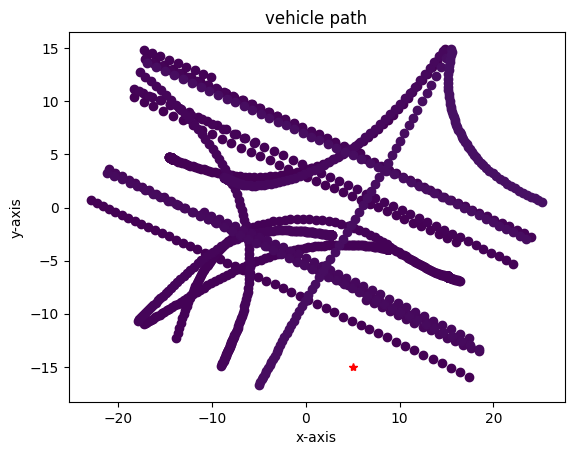

In [4]:
import matplotlib.pyplot as plt
import pandas
import matplotlib.colors as mcolors
import matplotlib.cm as cm

color_map = cm.viridis

data = pandas.read_csv("data.csv")
norm = mcolors.Normalize(vmin=0, vmax=len(data.id.unique()))

fig, ax = plt.subplots()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('vehicle path')
plt.ion()  # Turn on interactive mode for dynamic updating

for i in data.id.unique()[:20]:
    data_temp = data[data['id']==i]
    color = color_map(norm(i))

    # for _,row in data_temp.iterrows():
    ax.scatter(data_temp.x.to_list(),data_temp.y.to_list(),c=[color])

ax.plot(5,-15,c="red",marker = "*")
plt.ioff()
plt.show()



Clustering of Lidar 


In [1]:
import torch


In [2]:
import torch
import numpy as np
lidar = np.array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 11.366155624389648, 11.075774192810059, 10.803101539611816, 10.546699523925781, 10.305283546447754, 10.404522895812988, 10.554227828979492, 10.711647987365723, 10.877232551574707, 11.051470756530762, 11.234895706176758, 11.428088188171387, 11.631683349609375, 11.84637451171875, 12.072925567626953, 12.312172889709473, 12.56503963470459, 12.832541465759277, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 11.869912147521973, 11.822927474975586, 11.779923439025879, 11.74083137512207, 11.705587387084961, 11.6741361618042, 11.646427154541016, 12.665647506713867, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16])
filter_lidar = lidar[lidar<16]

In [3]:
filter_lidar


array([11.36615562, 11.07577419, 10.80310154, 10.54669952, 10.30528355,
       10.4045229 , 10.55422783, 10.71164799, 10.87723255, 11.05147076,
       11.23489571, 11.42808819, 11.63168335, 11.84637451, 12.07292557,
       12.31217289, 12.56503963, 12.83254147, 11.86991215, 11.82292747,
       11.77992344, 11.74083138, 11.70558739, 11.67413616, 11.64642715,
       12.66564751])

In [4]:
from math import degrees,sqrt,sin,cos
from std_msgs.msg import Int64MultiArray
import cmath

# count_threshold = 4
# length_threshold = sqrt((5**2)+(3.8**2))
tensor_set = list()
for i in filter_lidar:
        thetha = np.argwhere(lidar == i)[0][0]*0.017
        # z = complex(i*cos((lidar.index(i))*0.017),i*sin(lidar.index(i)*0.017))
        point_tensor = [float(i)*cos(thetha),float(i)*sin(thetha)]
        tensor_set.append(point_tensor)

tensors = torch.tensor(tensor_set).to('cuda')


In [5]:
tensors

tensor([[-0.8880, 11.3314],
        [-1.0529, 11.0256],
        [-1.2096, 10.7352],
        [-1.3589, 10.4588],
        [-1.5013, 10.1953],
        [-1.6905, 10.2663],
        [-1.8916, 10.3833],
        [-2.0987, 10.5040],
        [-2.3122, 10.6286],
        [-2.5324, 10.7574],
        [-2.7600, 10.8906],
        [-2.9954, 11.0286],
        [-3.2391, 11.1716],
        [-3.4918, 11.3201],
        [-3.7542, 11.4744],
        [-4.0270, 11.6350],
        [-4.3109, 11.8024],
        [-4.6070, 11.9771],
        [-8.1620,  8.6184],
        [-8.2744,  8.4449],
        [-8.3862,  8.2728],
        [-8.4973,  8.1021],
        [-8.6079,  7.9326],
        [-8.7180,  7.7642],
        [-8.8277,  7.5968],
        [-9.7393,  8.0972]], device='cuda:0')

In [6]:
car_pose = torch.tensor([[-5.095668,14.788768-2.46666],[-9.186936,9.929110-2.46666]]).to('cuda')

In [7]:
for i in torch.cdist(tensors,car_pose):
        #  print(torch.argmin(i)) 
        print(torch.argmin(i))
        # print(i)

tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')


In [8]:
norm_tensor

NameError: name 'norm_tensor' is not defined

/home/akshit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


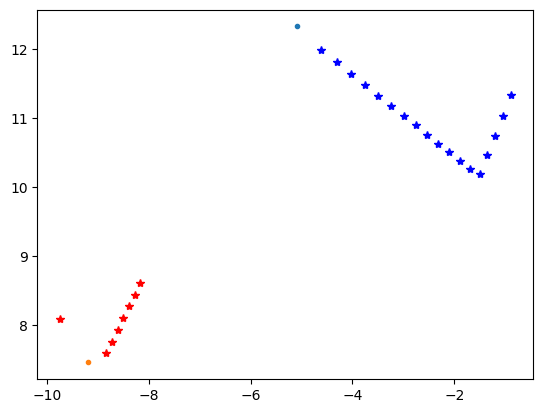

In [9]:
import matplotlib.pyplot as plt

color = {0: 'blue', 1: 'red'}

norm_tensor = torch.cdist(tensors,car_pose)
cnt = 0
plt.plot(car_pose[0][0].item(),car_pose[0][1].item(),marker = ".")
plt.plot(car_pose[1][0].item(),car_pose[1][1].item(),marker = ".")
for i in tensors:
    plt.plot(i[0].item(),i[1].item(),c = color[torch.argmin(norm_tensor[cnt]).item()],marker = "*")
    # print(torch.argmin(norm_tensor[cnt]).item())
    cnt+=1
plt.show()

EUCLEDEAN CLUSTERING

In [1]:
import torch
import numpy as np
from scipy.spatial.distance import cdist
from time import time
t0 = time()
index_dict = dict()
lidar_data = np.array([16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16                ,16                ,16               ,16               ,16               ,16               ,16               ,16               ,16                ,16                ,7.4688849449157715 ,7.2504119873046875 ,7.046463489532471  ,6.855727195739746  ,6.67704439163208   ,6.509391784667969  ,6.351858615875244  ,6.203633785247803  ,6.063992500305176  ,5.932284832000732  ,5.807925701141357  ,5.6903886795043945 ,5.579197406768799  ,5.4739203453063965 ,5.3741655349731445 ,5.279577255249023  ,5.1898298263549805 ,5.10462760925293   ,5.023698329925537  ,4.946794033050537  ,4.873685359954834  ,4.804162979125977  ,4.738033771514893  ,4.720409393310547  ,4.834488868713379  ,4.955781936645508  ,5.084922790527344  ,5.2226243019104    ,5.369689464569092  ,5.527027606964111  ,5.695669651031494  ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,16                ,14.60425090789795   ,14.30301284790039   ,14.018177032470703  ,13.748612403869629  ,13.493293762207031  ,13.251287460327148  ,13.021745681762695  ,12.80389404296875   ,12.597023963928223  ,12.400486946105957  ,12.213688850402832  ,12.036084175109863  ,12.015138626098633  ,12.289454460144043  ,12.580551147460938  ,12.8898344039917    ,16                ,16                ,16                ,16               ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16])
# lidar_data = lidar_data[lidar_data<16]
vel_list = np.zeros(lidar_data.shape[0])
ang_list = np.zeros(lidar_data.shape[0])

tensor = torch.tensor(lidar_data).to('cuda')


def batch_slice_tensor(tensor):
    result = []
    current_subarray = []

    for element in tensor:
        if element < 16:
            current_subarray.append(element)
        else:
            if current_subarray:
                result.append(torch.tensor(current_subarray).to('cuda'))
                current_subarray = []
    if current_subarray:
        result.append(torch.tensor(current_subarray).to('cuda'))

    return result
l = batch_slice_tensor(tensor=tensor)
lenth_threshold = 0.09 #parameter
from math import sin,cos
cluster = list()
lenth_threshold = 0.4
for i in l:
    temp_cluster = list()
    tensor_set = list()
    for j in i:
        thetha = np.argwhere(lidar_data == j.item())[0][0]*0.017 - 1.57
        # z = complex(i*cos((lidar.index(i))*0.017),i*sin(lidar.index(i)*0.017))
        point_tensor = [float(j.item())*cos(thetha),float(j.item())*sin(thetha)]
        index_dict[point_tensor[0]] = j.item()
        tensor_set.append(point_tensor)
    
    tensor_set_ = torch.tensor(tensor_set).to('cuda')

    for k in range(1,len(tensor_set)):
        length = torch.norm(tensor_set_[k]-tensor_set_[k-1])
        # print(length)
        if abs(length.item())>lenth_threshold:
            cluster.append(temp_cluster)
            temp_cluster = list()
            # print("thresh")
        
        temp_cluster.append(tensor_set[k])
        # print(temp_cluster)
    if temp_cluster:
        cluster.append(temp_cluster)
        

    

m_list = list()
for i in cluster:
    if i:
        m_list.append(np.mean(i,axis=0).tolist())
m_list = np.array(m_list)

arr_prev = np.array([[ 0.35747381,  3.73943314],
       [-8.82248287,  9.37740821]])


arr_curr = m_list

dist = cdist(arr_curr,arr_prev)
try:
    cluster.remove([])
except Exception as e:
    print(e)
from math import atan

for i in range(m_list.shape[0]):
    id = np.argmin(dist[i]) #id refers to cluster id
    velocity = dist[i][id]/0.03
    a1 = torch.tensor(np.vstack((arr_curr[i],arr_prev[id]))).to('cuda')
    print(a1)
    diff = torch.diff(a1,dim=0)

    if velocity:
        angle = atan(diff[0][1].item()/(diff[0][0].item()))
    else:
        angle = 0
    
      
    print(angle) 
    # print(velocity)
    # print(cluster[id])
    for k in cluster[id]:
        idx = np.where(lidar_data == index_dict[k[0]])[0].item()
        # print(index_dict[k[0]])
        vel_list[idx] = velocity
        ang_list[idx] = angle


t2 = time()


list.remove(x): x not in list
tensor([[ 3.8149, -4.0207],
        [ 0.3575,  3.7394]], device='cuda:0', dtype=torch.float64)
-1.1516541138522258
tensor([[9.3704, 8.8299],
        [0.3575, 3.7394]], device='cuda:0', dtype=torch.float64)
0.5141370380412114


In [2]:
len(cluster)

2

```
LOGS

array([[ 4.39528485,  0.99289812],
       [ 0.18490551,  4.52989102],
       [-0.70995157,  2.22119054]])

array([[ 4.39487931,  0.99279313],
       [ 0.18486698,  4.52894719],
       [-0.70957144,  2.21999399]])


array([[ 0.35747381,  3.73943314],
       [-8.82248287,  9.37740821]])

```

/home/akshit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


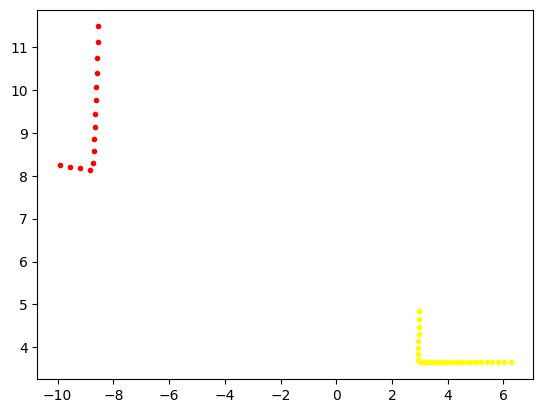

In [13]:
color = ["yellow","red",'blue','orange']
 
import matplotlib.pyplot as plt
cnt = 0
tot = 0
for i in cluster:
    for j in i:
        tot+=1
        plt.plot(j[0],j[1],color = color[cnt],marker = ".")
    cnt+=1
        # print(j)
plt.show()

In [14]:
final = np.vstack((lidar_data,vel_list,ang_list))
np.save('final.npy',final)

In [15]:
def process(self):

        # linear_transform = torch.tensor([self.x,self.y])
        # angular_tranform = torch.tensor([[cos(self.phi),-1*sin(self.phi)],
        #                                     [sin(self.phi), cos(self.phi)]])

        #time thresholds
        if self.control_loop_init: 

            
            self.time_threshold = self.time_int*100

            self.greater_threshold[2] = self.time_threshold
            keys_to_be_deleted = list()
  
            

            '''
            check whether ego vehicle has been updated or not, if yes then the transformation matrices are 
            updated and coordinates are transformed over cuda/cpu of each vehicle.
            Done to avoid computing transformation over each iteration even if there is no change in odometry
            '''
            # linear_truth = self.linear_transform[0] != self.x or self.linear_transform[1] != self.y
            # angular_truth = self.angular_transform[0][0] != cos(self.phi) or self.angular_transform[0][1] != -1*sin(self.phi) or self.angular_transform[1][0] != sin(self.phi) or self.angular_transform[1][1] != cos(self.phi) 
            for i in vector_map:
                linear_truth = round((self.linear_transform[0].item() - self.x),2) != 0.0 or round((self.linear_transform[1].item() - self.y),2) != 0 
                angular_truth = round((self.angular_transform[0][0].item() - cos(self.phi)),2) != 0.0 or round((self.angular_transform[0][1].item() - (-1)*sin(self.phi)),2) != 0.0 or round((self.angular_transform[1][0].item() - sin(self.phi)),2) != 0.0 or round((self.angular_transform[1][1].item() - cos(self.phi)),2) != 0.0

            
                self.get_logger().info(f"{self.x}")

                if (linear_truth):
                    self.linear_transform[0] = self.x
                    self.linear_transform[1] = self.y
                if (angular_truth):
                    self.angular_transform[0][0] = cos(self.phi)
                    self.angular_transform[0][1] = -1*sin(self.phi)
                    self.angular_transform[1][0] = sin(self.phi)
                    self.angular_transform[1][1] = cos(self.phi)

                if (linear_truth or angular_truth):
                    self.result_map[i] = self.vector_map[i] - self.linear_transform
                    self.result_map[i] = torch.bmm(self.vector_map[i].unsqueeze(0),self.angular_transform.unsqueeze(0)).squeeze() 
                # self.get_logger().info("vector state map updated")

                idx = self.individual_idx_counter[i].item()

                    ## transformation of vector map
                   
                    ## check if the traffic vehicle is within fov and has been spawned yet, based on current timestamp shown by self.timeint
                    
                try:
                    truth_tensor = self.result_map[i][idx].less_equal(self.greater_threshold)
                    greater_truth = False if False in truth_tensor else True
                    less_truth = False if False in self.result_map[i][idx].greater_equal(self.lesser_threshold) else True
                    if self.result_map[i][idx][2].equal(self.greater_threshold[2]):
                        self.individual_idx_counter[i]+=1   #only increment in index if they have been spawned

                    self.pub_list[i] = int(greater_truth and less_truth)
                    

                except IndexError:
                    # self.get_logger().info(str(e.__class__.__name__))
                    self.pub_list[i] = 0
                    keys_to_be_deleted.append(i)
                    self.exit_counter+=1
                
                        
            #delete entries whose data is not available after this iteration
            
            for key in keys_to_be_deleted:
                del self.vector_map[key] 
                del self.result_map[key]
            #when all entries are deleted
            if self.exit_counter==self.exit_threshold:   #kills the node when no more vehicle are there to analyse
                self.get_logger().info("killing node now")
                self.get_logger().info("length: "+str(len(self.vector_map)))
                self.get_logger().info(str(self.time_int))
                self.destroy_node()
                rclpy.shutdown() 

            d = np.nonzero(self.pub_list)[0].tolist()
            d.append(self.time_int) ##like a checksum
            self.msg.data = d
            
            self.status_publisher.publish(self.msg)
            # self.get_logger().info("publishing status list")
            # self.get_logger().info(str(self.exit_counter))

            self.time_int+=1